In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
cnn_path_csv = 'CNN_output/CNN_test_history.csv'
cnn_path_npz = 'CNN_output/CNN_training_history.npz'
rnn_path_csv = 'RNN_output/RNN_test_history.csv'
rnn_path_npz = 'RNN_output/RNN_training_history.npz'
mlp_path_csv = 'MLP_output/MLP_test_history.csv'
mlp_path_npz = 'MLP_output/MLP_training_history.npz'

val_cnn_accuracy = pd.read_csv(cnn_path_csv)['val_accuracy'].values
val_cnn_loss = pd.read_csv(cnn_path_csv)['val_loss'].values
val_rnn_accuracy = pd.read_csv(rnn_path_csv)['val_accuracy'].values
val_rnn_loss = pd.read_csv(rnn_path_csv)['val_loss'].values
val_mlp_accuracy = pd.read_csv(mlp_path_csv)['val_accuracy'].values
val_mlp_loss = pd.read_csv(mlp_path_csv)['val_loss'].values

In [3]:
train_cnn_accuracy = np.load(cnn_path_npz)['accuracy']
train_cnn_loss = np.load(cnn_path_npz)['loss']
train_rnn_accuracy = np.load(rnn_path_npz)['accuracy']
train_rnn_loss = np.load(rnn_path_npz)['loss']
train_mlp_accuracy = np.load(mlp_path_npz)['accuracy']
train_mlp_loss = np.load(mlp_path_npz)['loss']

In [4]:
# val_mlp_accuracy = []
# val_mlp_loss = []
# train_mlp_accuracy = []
# train_mlp_loss = []
# for i in range(1,181):
#     mlp_path_csv = 'MLP_output/MLP' + str(i) + '_test_history.csv'
#     mlp_path_npz = 'MLP_output/MLP' + str(i) + '_training_history.npz'
    
#     current_val_accuracy = pd.read_csv(mlp_path_csv)['val_accuracy'].values
#     current_val_loss = pd.read_csv(mlp_path_csv)['val_loss'].values
    
#     current_train_accuracy = np.load(mlp_path_npz)['accuracy']
#     current_train_loss = np.load(mlp_path_npz)['loss']
    
#     val_mlp_accuracy = np.append(val_mlp_accuracy, current_val_accuracy)
#     val_mlp_loss = np.append(val_mlp_loss, current_val_loss)
#     train_mlp_accuracy = np.append(train_mlp_accuracy, current_train_accuracy)
#     train_mlp_loss = np.append(train_mlp_loss, current_train_loss)
    
    

In [5]:
print(len(train_cnn_accuracy))
print(len(train_rnn_accuracy))
print(len(train_mlp_accuracy))

158220
15840
158220


In [6]:
compressed_cnn_accuracy = []
compressed_mlp_accuracy = []
for i in range(15800):
    compressed_cnn_accuracy.append(train_cnn_accuracy[i*10])
    compressed_mlp_accuracy.append(train_mlp_accuracy[i*10])
print(len(compressed_mlp_accuracy))

15800


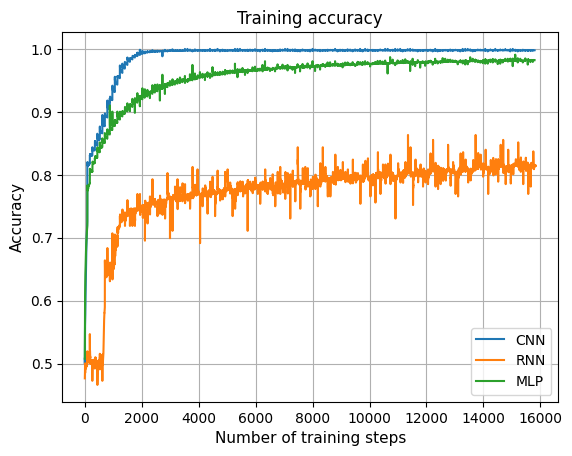

In [7]:
plt.plot(compressed_cnn_accuracy, label='CNN')
plt.plot(train_rnn_accuracy, label='RNN')
plt.plot(compressed_mlp_accuracy, label='MLP')
plt.xlabel('Number of training steps', fontsize=11)
plt.ylabel('Accuracy', fontsize=11)
plt.grid()
plt.title('Training accuracy', fontsize=12)
plt.legend()
plt.savefig('dnn-based-train-acc.png')
plt.show()

In [8]:
val_cnn_x = []
for i in range(9):
    val_cnn_x.append(i*17578)

val_mlp_x = []
for i in range(180):
    val_mlp_x.append(i*87)
print(val_mlp_x[-1])
print(val_cnn_x[-1])

15573
140624


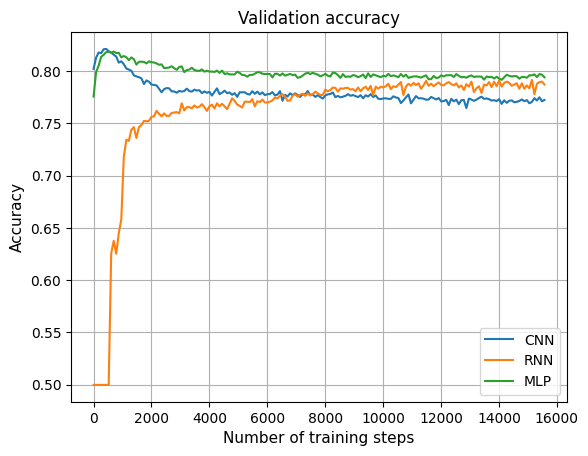

In [9]:
plt.plot(val_mlp_x, val_cnn_accuracy, label='CNN')
plt.plot(val_mlp_x, val_rnn_accuracy, label='RNN')
plt.plot(val_mlp_x, val_mlp_accuracy, label='MLP')
plt.xlabel('Number of training steps', fontsize=11)
plt.ylabel('Accuracy', fontsize=11)
plt.title('Validation accuracy', fontsize=12)
plt.grid()
plt.legend(loc = 'lower right')
plt.savefig('dnn-based-eval-acc.png')
plt.show()

In [75]:
print(val_rnn_accuracy.max())
print(val_cnn_accuracy.max())
print(val_mlp_accuracy.max())

0.7915999889373779
0.8213199973106384
0.8188400268554688


In [76]:
print(train_rnn_accuracy.max())
print(train_cnn_accuracy.max())
print(train_mlp_accuracy.max())

0.86328125
1.0
1.0


In [54]:
print(train_rnn_loss.min())
print(train_cnn_loss.min())
print(train_mlp_loss.min())

0.33385297656059265
4.842285125050694e-05
0.0022271787747740746


In [55]:
print(val_rnn_loss.min())
print(val_cnn_loss.min())
print(val_mlp_loss.min())

0.4436015188694
0.3907838761806488
0.3986386656761169
